In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization library
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns # interactive visualization library built on top on matplotlib
sns.set(rc={'figure.figsize':(7,5)})

data = pd.read_csv('./data/raw_tweets_2020.csv')

# TO CORRECT:
# the verbs are not lemmatized (see the world cloud)

In [2]:
#importing different libraries for analysis, processing and classification
import nltk
from sklearn import re #regular expression for text processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 
# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria

In [3]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [4]:
data['normalized_text'] = data.Text.apply(normalizer)

In [5]:
data = data.drop_duplicates(subset = 'normalized_text')

In [6]:
data.head()

,Label,Text,Timestamp,Timestamp_epochs,normalized_text
0,NaN,There's Coronavirus around and italians have b...,2020-01-25T14:02:17,1579960937,coronavirus around italian talking man undress...
1,NaN,Gosh the Italians are taking this #coronavirus...,2020-01-27T08:29:52,1580113792,gosh italian taking coronavirus threat really ...
2,NaN,"it has been a long time, since last week, that...",2020-01-28T13:26:32,1580217992,long time since last week italian country citi...
3,NaN,Italians really bullied a 13 year old Chinese ...,2020-01-28T08:24:02,1580199842,italian really bullied year old chinese player...
4,NaN,52 million of Chinese trapped. Only a Regime c...,2020-01-26T10:54:15,1580036055,million chinese trapped regime like forbidding...


In [7]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [8]:
data['hashtag'] = data.Text.apply(extract_hashtag)

In [9]:
data.head()

,Label,Text,Timestamp,Timestamp_epochs,normalized_text,hashtag
0,NaN,There's Coronavirus around and italians have b...,2020-01-25T14:02:17,1579960937,coronavirus around italian talking man undress...,
1,NaN,Gosh the Italians are taking this #coronavirus...,2020-01-27T08:29:52,1580113792,gosh italian taking coronavirus threat really ...,coronavirus
2,NaN,"it has been a long time, since last week, that...",2020-01-28T13:26:32,1580217992,long time since last week italian country citi...,
3,NaN,Italians really bullied a 13 year old Chinese ...,2020-01-28T08:24:02,1580199842,italian really bullied year old chinese player...,
4,NaN,52 million of Chinese trapped. Only a Regime c...,2020-01-26T10:54:15,1580036055,million chinese trapped regime like forbidding...,


In [10]:
all_words = " ".join(data.Text)

In [11]:
all_words

'There\'s Coronavirus around and italians have been talking of a man that undressed his tie in sign of retirement since a week... Gosh the Italians are taking this #coronavirus threat really seriously.. \xa0 it has been a long time, since last week, that italians and other country citizen come back from Wuhan airport to Bologna airport and Farnesina DO NOTHING, why pointing at cinese people just right now? It is a matter of  ethnicity?? CORONAVIRUS does NOT make skin difference. Italians really bullied a 13 year old Chinese player and made him cry; telling him that they hope he gets the corona virus... Like are Italians born racist or something ? 52 million of Chinese trapped. Only a Regime can do this. It\'s like forbidding almost all Italians from leaving homes, travelling! Xi is in deep shit this time. He tried 2put the blame on bats/snakes/dirt (horrible but?) for the Coronavirus. Airports/Emergency Rooms r a madhouse. The #Italiangovernment is organising a flight to the #Chinese c

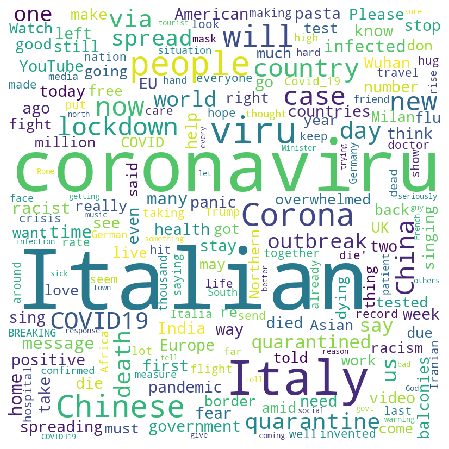

In [12]:
plt.figure(figsize=(16, 8))

wordcloud = WordCloud(height=800, width=800, stopwords=STOPWORDS, background_color='white',collocations=False)
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Figure size 1008x432 with 0 Axes>

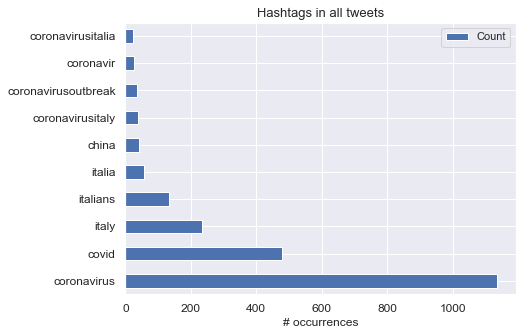

In [13]:
all_hashtags = FreqDist(list(' '.join(data.hashtag.values).split())).most_common(10)
plt.figure(figsize=(14, 6))
pd.DataFrame(all_hashtags, columns=['hashtag', 'Count']).set_index('hashtag').plot.barh(fontsize=12)
plt.xlabel('# occurrences')
plt.title('Hashtags in all tweets', size=13)
plt.ylabel('')
plt.show()

In [14]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

def get_sentiment(tweetList):
    label = []
    arrayTextBlob = [TextBlob(tweet) for tweet in tweetList]
    
    for tweet in arrayTextBlob:
        if (tweet.sentiment.polarity < 0):
            label.append(1)
        else:
            label.append(0)
            
    return label


def get_sentiment_NB(tweetList):
    label = []
    arrayTextBlob = [TextBlob(tweet, analyzer=NaiveBayesAnalyzer()) for tweet in tweetList]
    
    for tweet in arrayTextBlob:
        if (tweet.sentiment.classification == 'neg'):
            label.append(1)
        else:
            label.append(0)
            
    return label

In [15]:
data.Label = get_sentiment(data.normalized_text)

In [16]:
data.head()

,Label,Text,Timestamp,Timestamp_epochs,normalized_text,hashtag
0,0,There's Coronavirus around and italians have b...,2020-01-25T14:02:17,1579960937,coronavirus around italian talking man undress...,
1,1,Gosh the Italians are taking this #coronavirus...,2020-01-27T08:29:52,1580113792,gosh italian taking coronavirus threat really ...,coronavirus
2,0,"it has been a long time, since last week, that...",2020-01-28T13:26:32,1580217992,long time since last week italian country citi...,
3,0,Italians really bullied a 13 year old Chinese ...,2020-01-28T08:24:02,1580199842,italian really bullied year old chinese player...,
4,1,52 million of Chinese trapped. Only a Regime c...,2020-01-26T10:54:15,1580036055,million chinese trapped regime like forbidding...,


In [17]:
test = data[["Label", "normalized_text"]]

In [18]:
#test.to_csv("./data/test_coronavirus_labeled.csv", index=False)

In [33]:
test_label_1 = test[test.Label == 1]

In [34]:
test_label_1

,Label,normalized_text
1,1,gosh italian taking coronavirus threat really ...
4,1,million chinese trapped regime like forbidding...
7,1,plenty helpful gag coronavirus rinky dink mexi...
8,1,think italian ridiculous consider racist act s...
9,1,wanna say italian bari asian mean coronavirus ...
...,...,...
3933,1,coronavirus already killed italian people arou...
3935,1,coronavirus italian angry china want war damage
3942,1,hopefully corona virus subsided italian need t...
3946,1,terrible news key italian still safe india cor...


In [35]:
test_label_1 = test_label_1.reindex(columns = test_label_1.columns.tolist() + ['label'])

In [37]:
test_label_1 = test_label_1[["normalized_text","label"]]

In [38]:
test_label_1.head()

,normalized_text,label
1,gosh italian taking coronavirus threat really ...,NaN
4,million chinese trapped regime like forbidding...,NaN
7,plenty helpful gag coronavirus rinky dink mexi...,NaN
8,think italian ridiculous consider racist act s...,NaN
9,wanna say italian bari asian mean coronavirus ...,NaN


In [ ]:
#test_label_1.label = get_sentiment_NB(test_label_1.normalized_text)

In [ ]:
#test_label_1.to_csv("./data/test_coronavirus_labeled_only_1.csv", index=False)